In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,patient_id,sex,age_group,height_cm,weight_kg,waist_circumference_cm,vision_left,vision_right,hearing_left,hearing_right,...,hemoglobin_level,urine_protein_level,serum_creatinine,ast_enzyme_level,alt_enzyme_level,ggt_enzyme_level,oral_health_status,dental_cavity_status,tartar_presence,has_copd_risk
0,12675,M,60,165,55,76.0,1.0,1.0,1.0,1.0,...,14.1,1.0,0.7,26.0,21.0,17.0,Y,0,Y,1
1,3097,M,40,175,80,94.0,1.0,1.0,1.0,1.0,...,15.0,1.0,0.9,15.0,15.0,35.0,Y,1,Y,0
2,45345,M,35,180,90,98.0,1.2,1.5,1.0,1.0,...,16.0,1.0,0.8,21.0,26.0,15.0,Y,0,Y,0
3,40390,M,40,175,70,77.8,1.0,1.2,1.0,1.0,...,16.4,1.0,0.9,18.0,13.0,20.0,Y,0,N,0
4,36755,M,45,175,65,78.0,1.5,1.5,1.0,1.0,...,15.8,1.0,0.9,19.0,18.0,39.0,Y,0,Y,0


In [5]:
train_df.shape

(44553, 27)

In [6]:
train_df.dtypes

,0
patient_id,int64
sex,object
age_group,int64
height_cm,int64
weight_kg,int64
waist_circumference_cm,float64
vision_left,float64
vision_right,float64
hearing_left,float64
hearing_right,float64


In [7]:
train_df.isnull().sum()

,0
patient_id,0
sex,0
age_group,0
height_cm,0
weight_kg,0
waist_circumference_cm,0
vision_left,0
vision_right,0
hearing_left,0
hearing_right,0


In [8]:
train_df.has_copd_risk.value_counts()

,count
has_copd_risk,
0,28210
1,16343


In [9]:
train_df.oral_health_status.value_counts()

,count
oral_health_status,
Y,44553


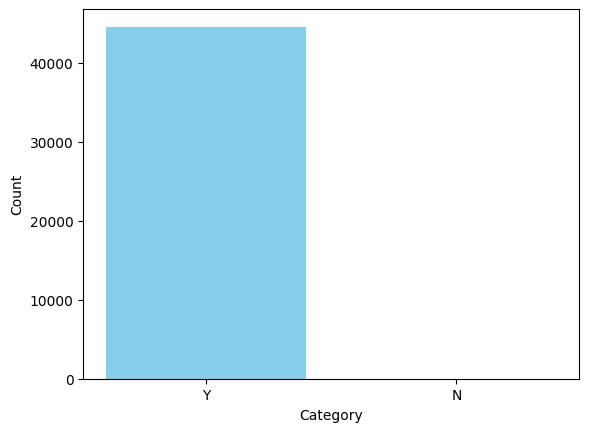

In [10]:
import matplotlib.pyplot as plt
plt.bar(['Y', 'N'], [44553, 0], color = 'skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [11]:
train_df.sex.value_counts()

,count
sex,
M,28326
F,16227


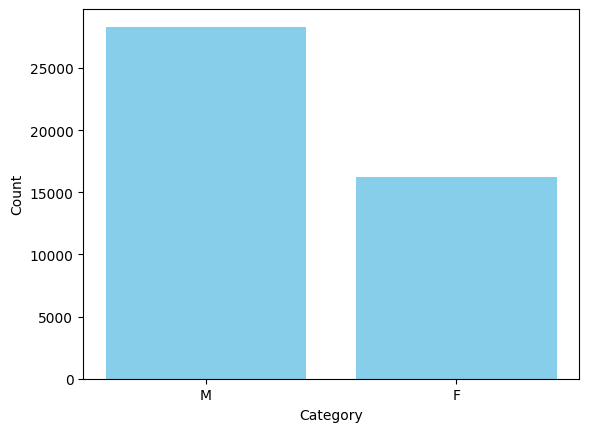

In [12]:
plt.bar(['M', 'F'], [28326, 16227], color = 'skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [13]:
train_df.tartar_presence.value_counts()

,count
tartar_presence,
Y,24742
N,19811


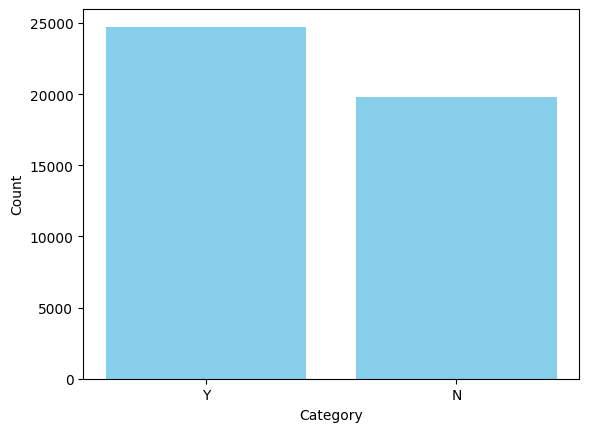

In [14]:
plt.bar(['Y', 'N'], [24742, 19811], color = 'skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Seems oral_health_status is not useful as it has only Y

These are objects and we need to convert them into float

In [15]:
train_df.sex = train_df.sex.map({'M':1, 'F':0})
train_df.sex

,sex
0,1
1,1
2,1
3,1
4,1
...,...
44548,1
44549,1
44550,1
44551,0


In [16]:
train_df.tartar_presence = train_df.tartar_presence.map({'Y':1, 'N':0})
train_df.tartar_presence

,tartar_presence
0,1
1,1
2,1
3,0
4,1
...,...
44548,1
44549,1
44550,1
44551,1


In [17]:
has_inf = train_df.isin([np.inf, -np.inf]).any().any()
print(has_inf)

False


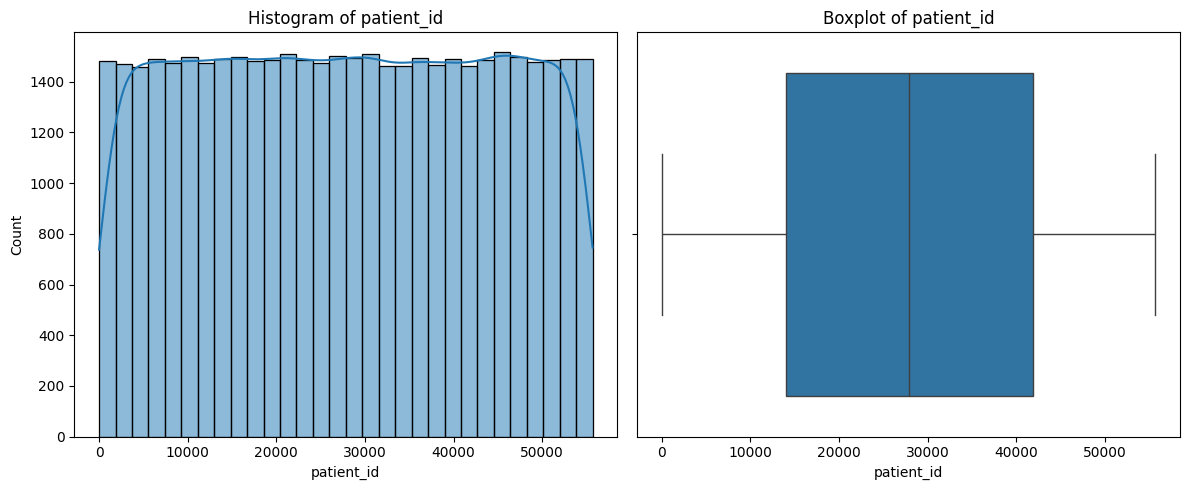

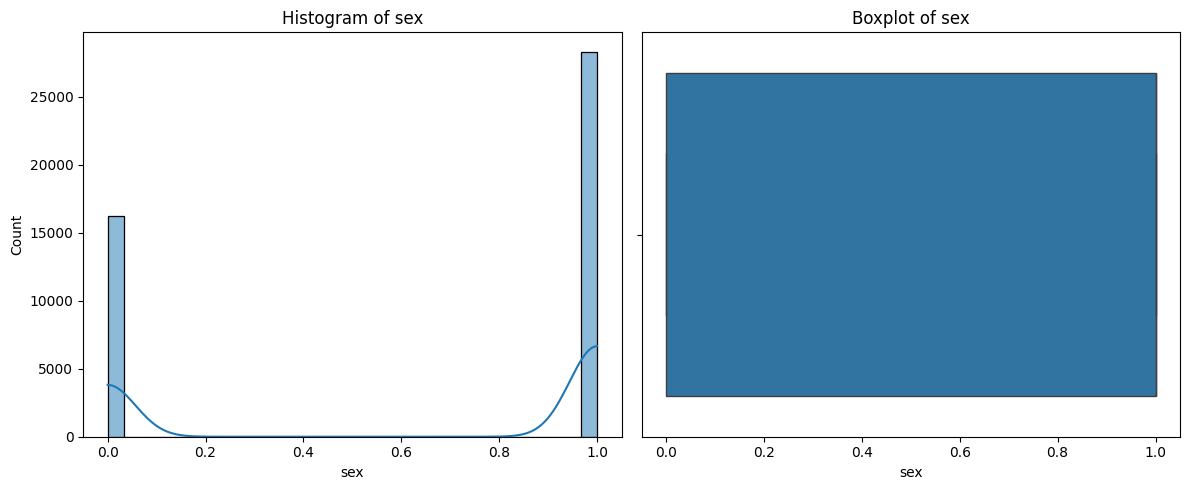

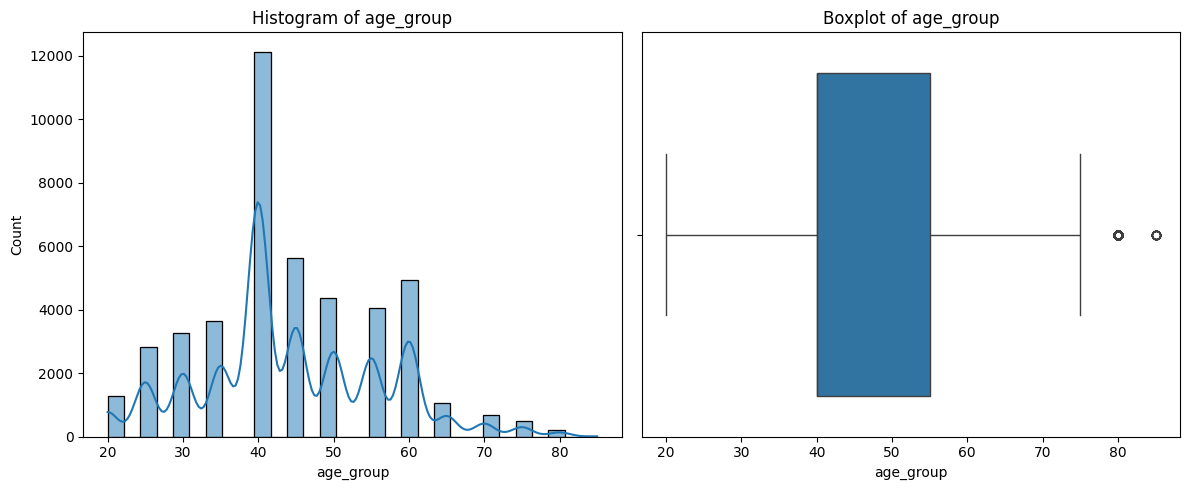

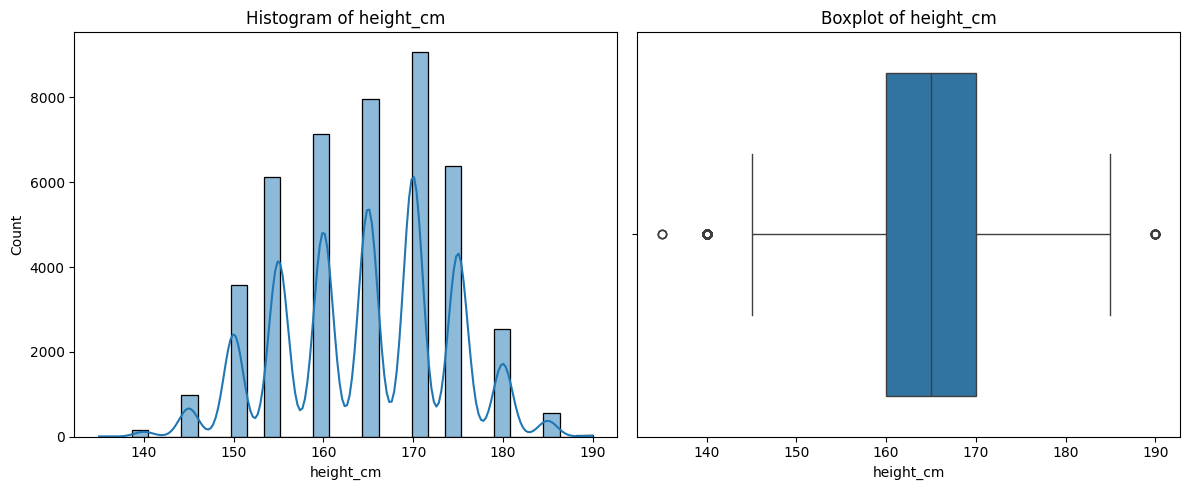

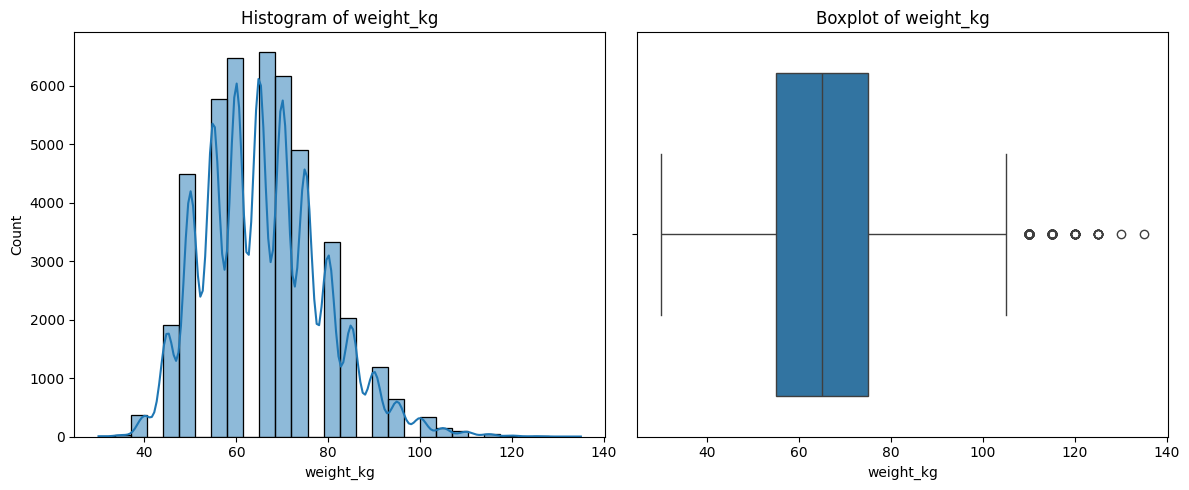

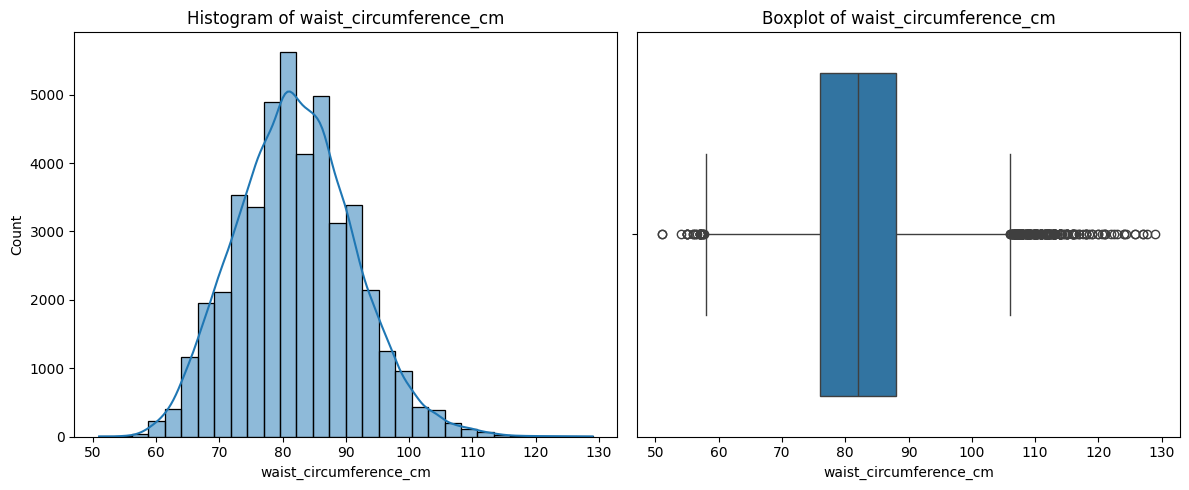

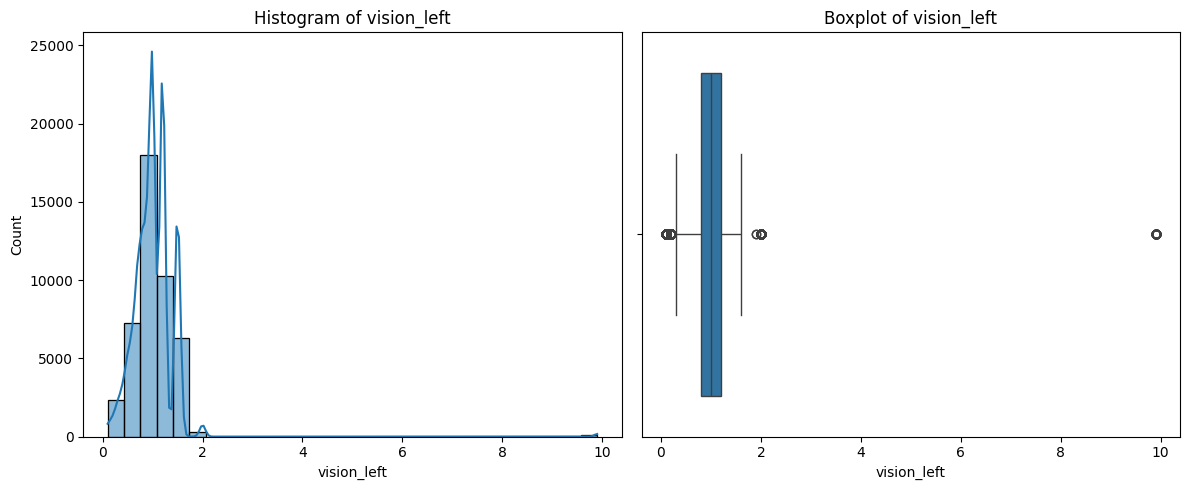

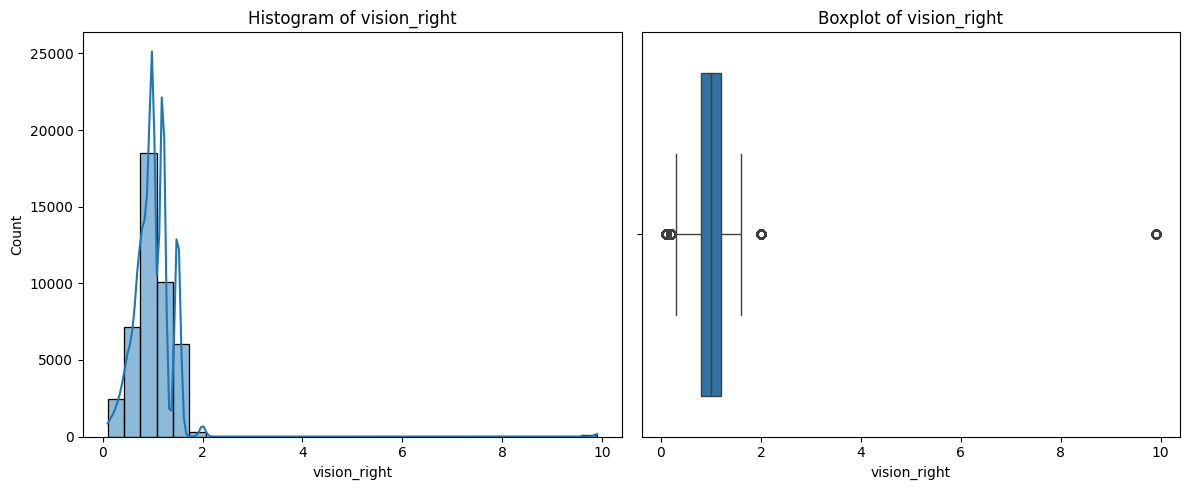

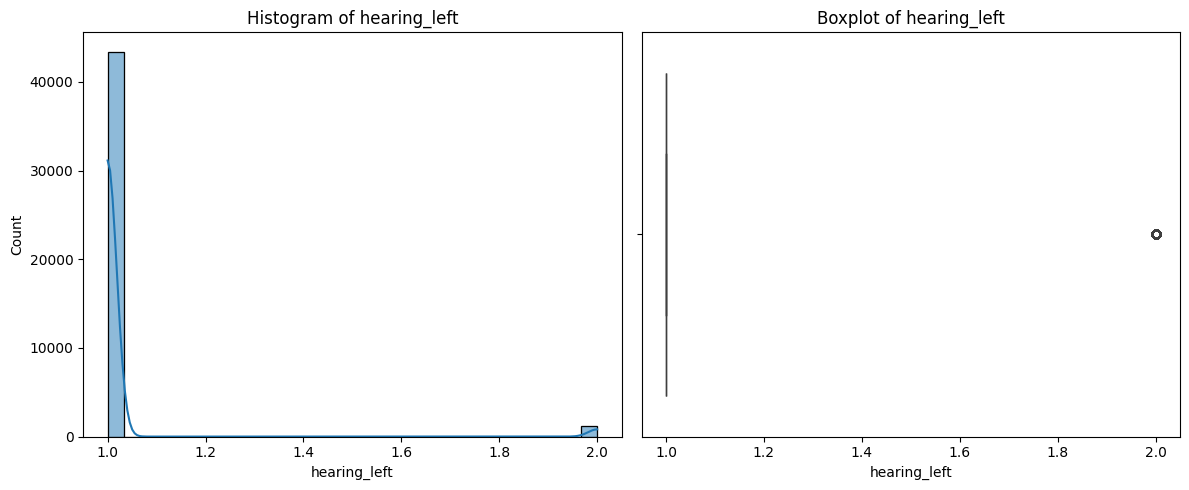

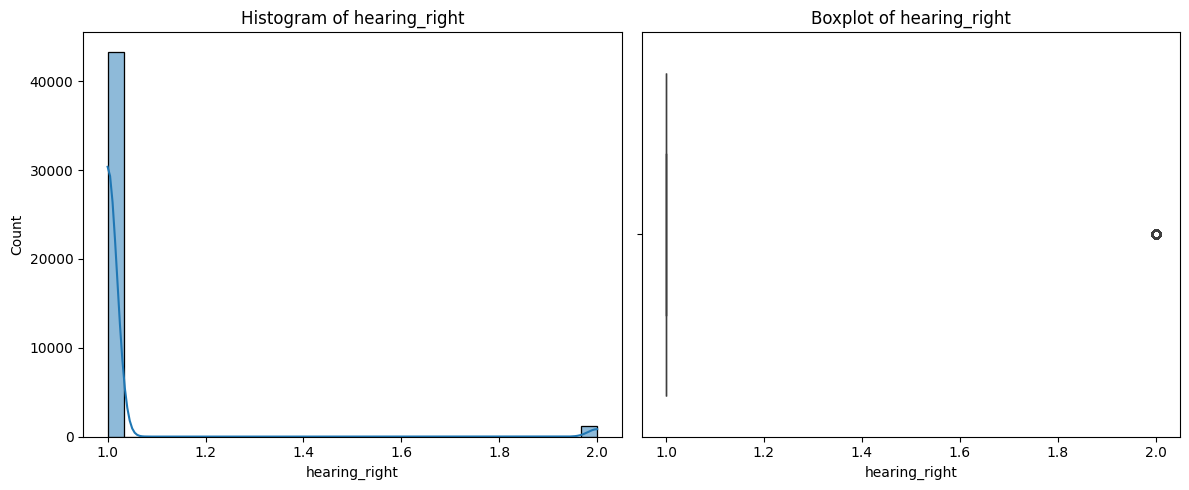

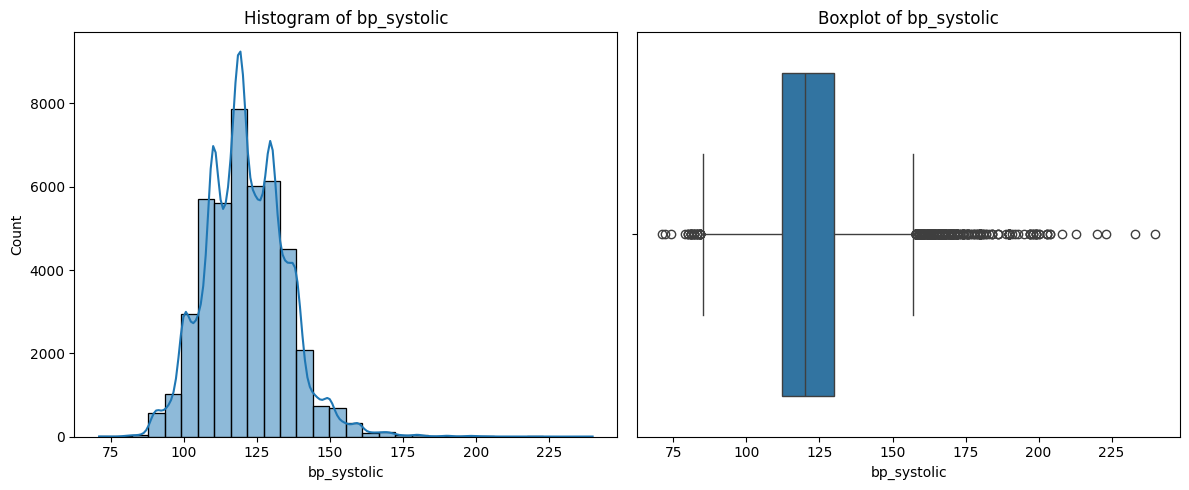

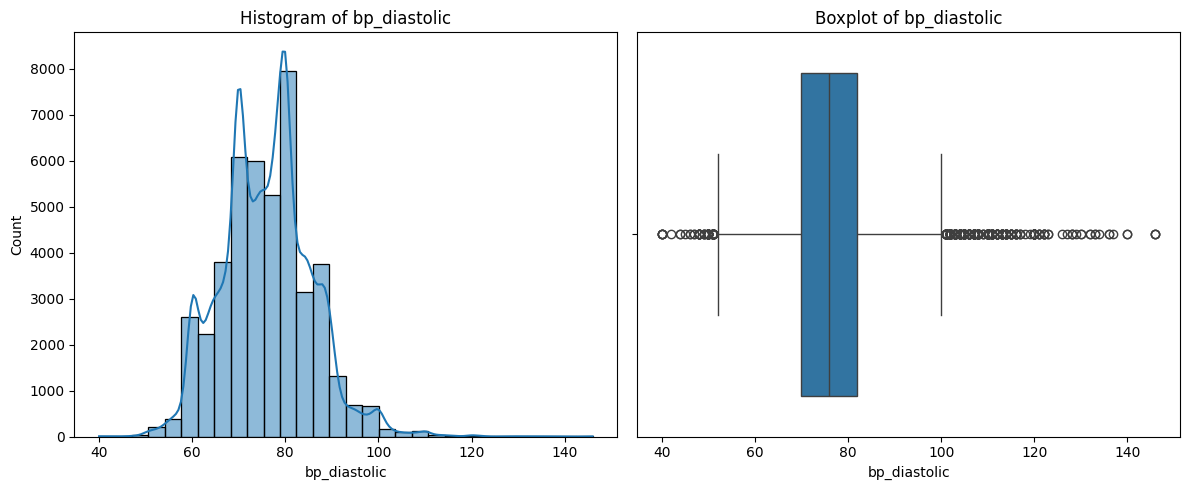

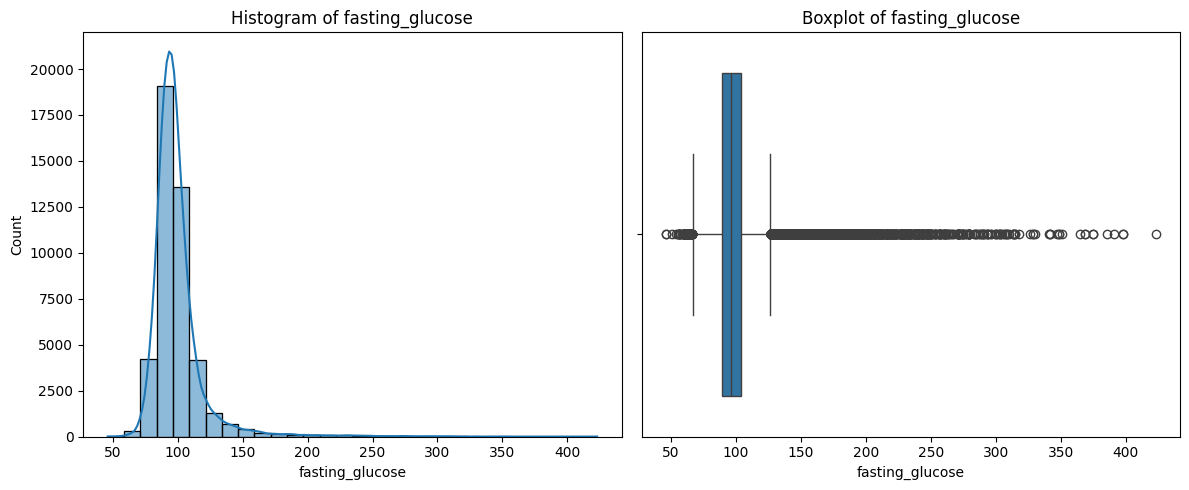

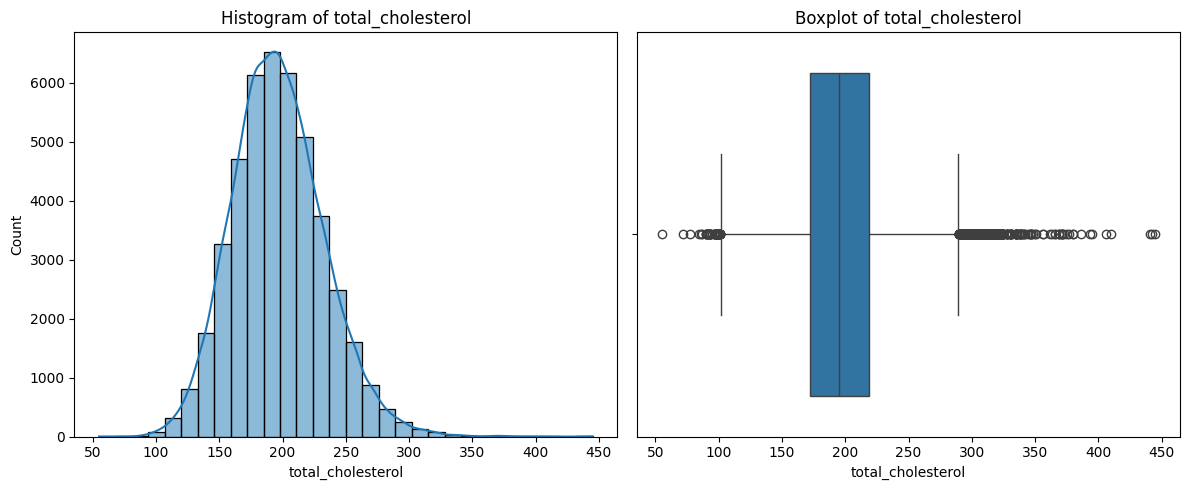

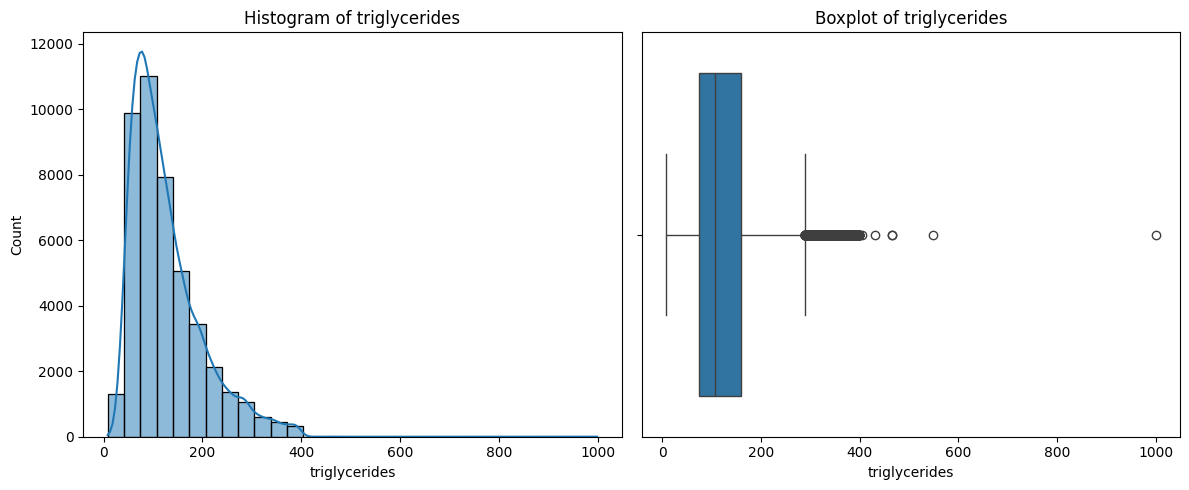

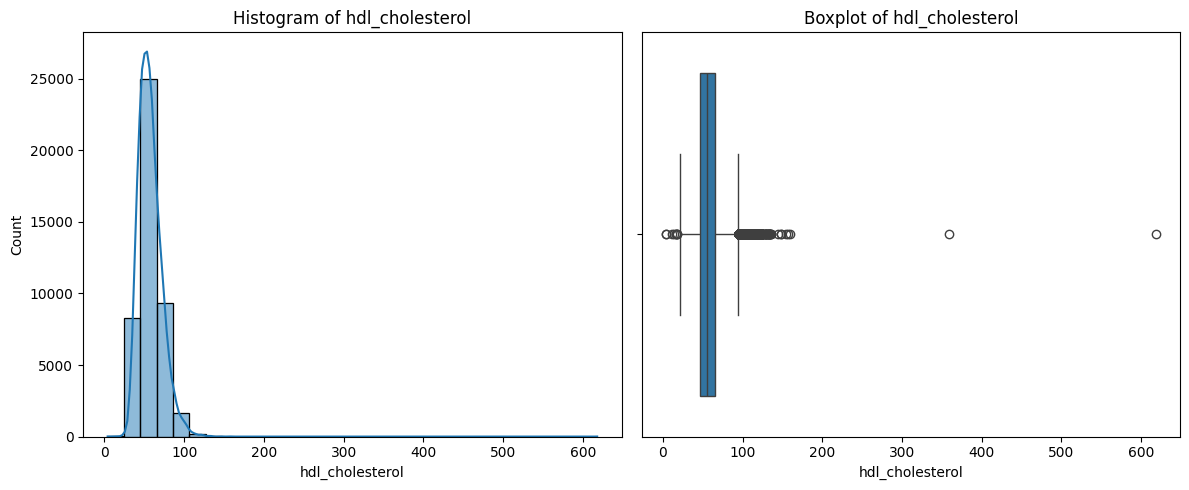

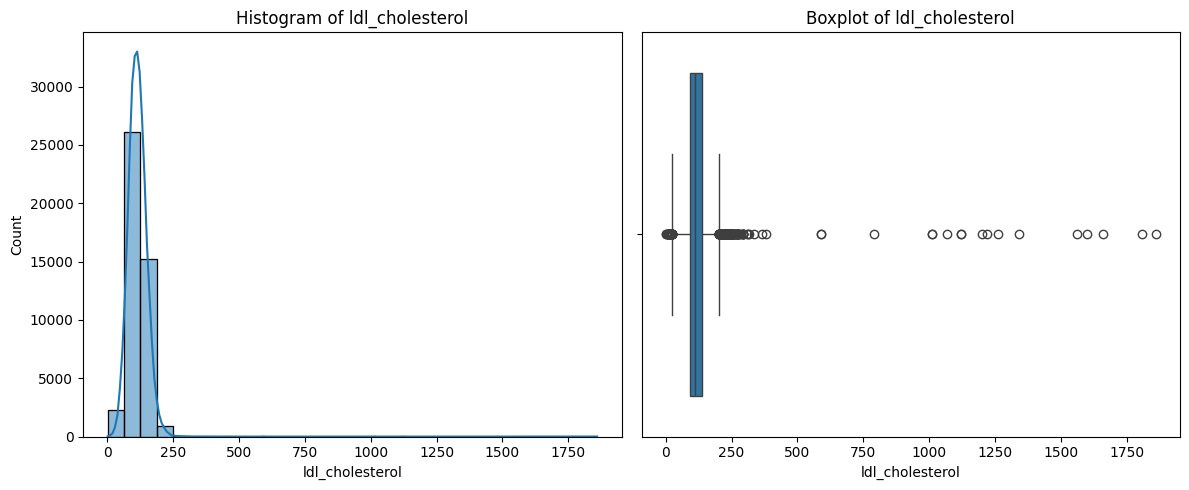

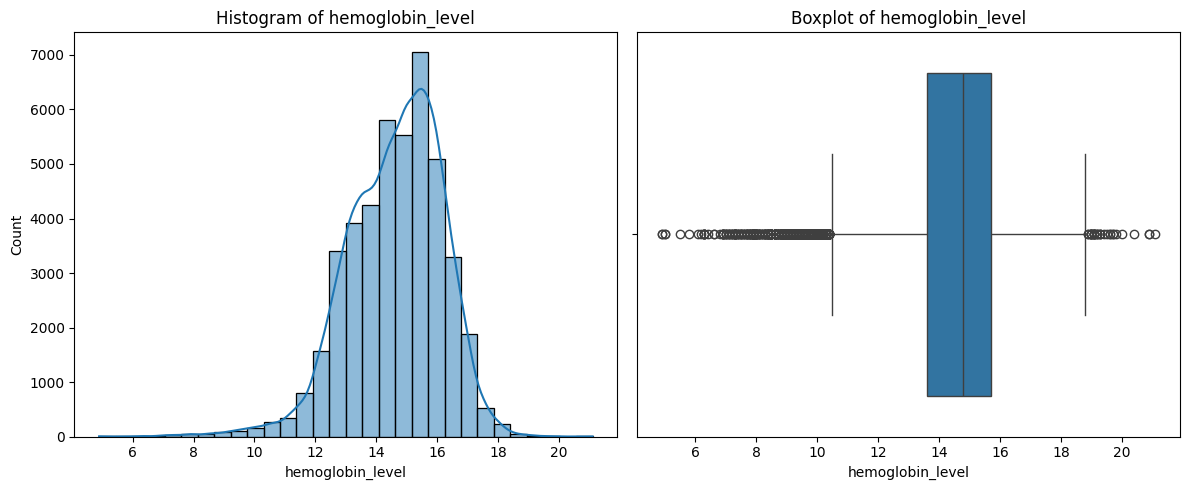

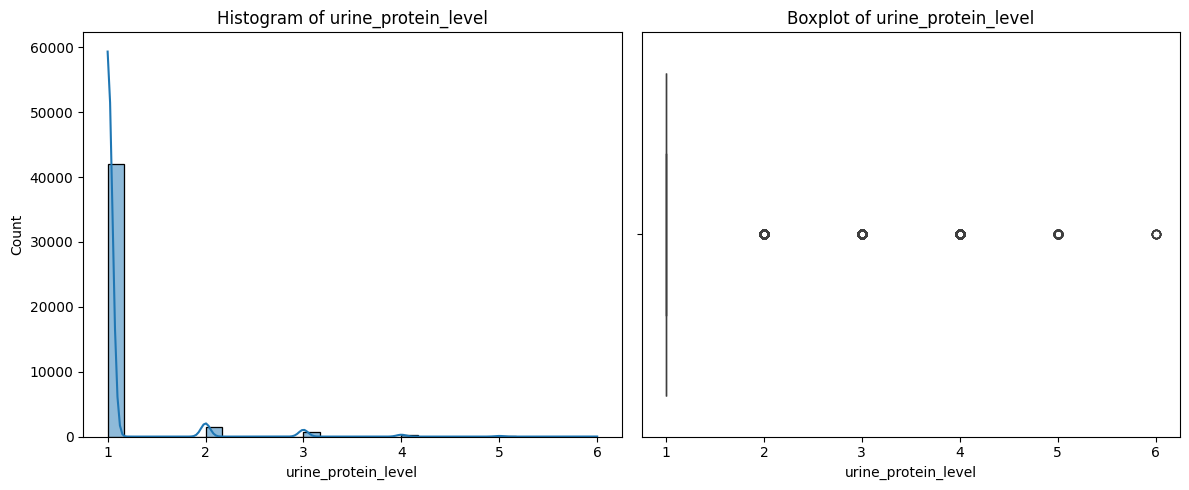

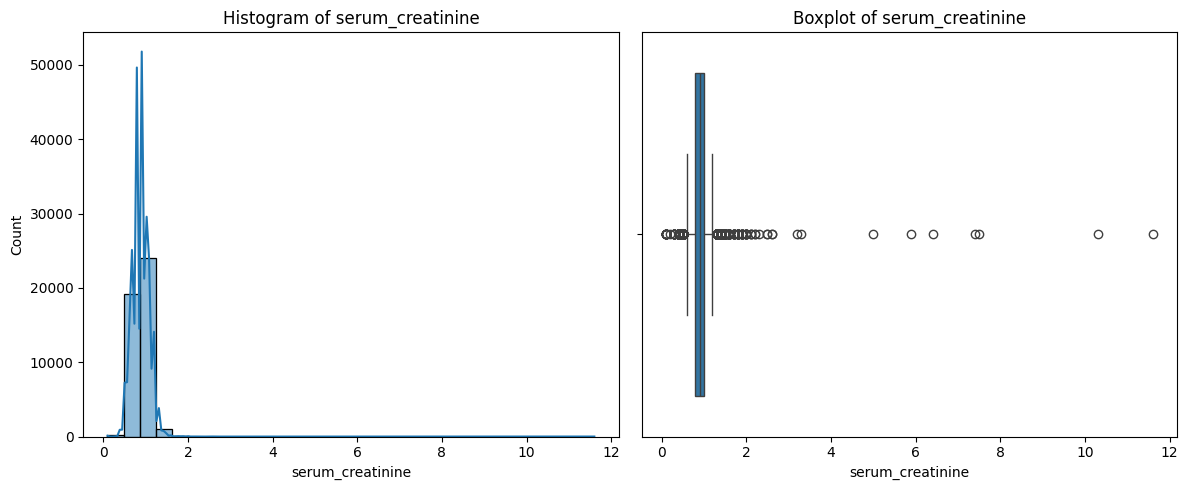

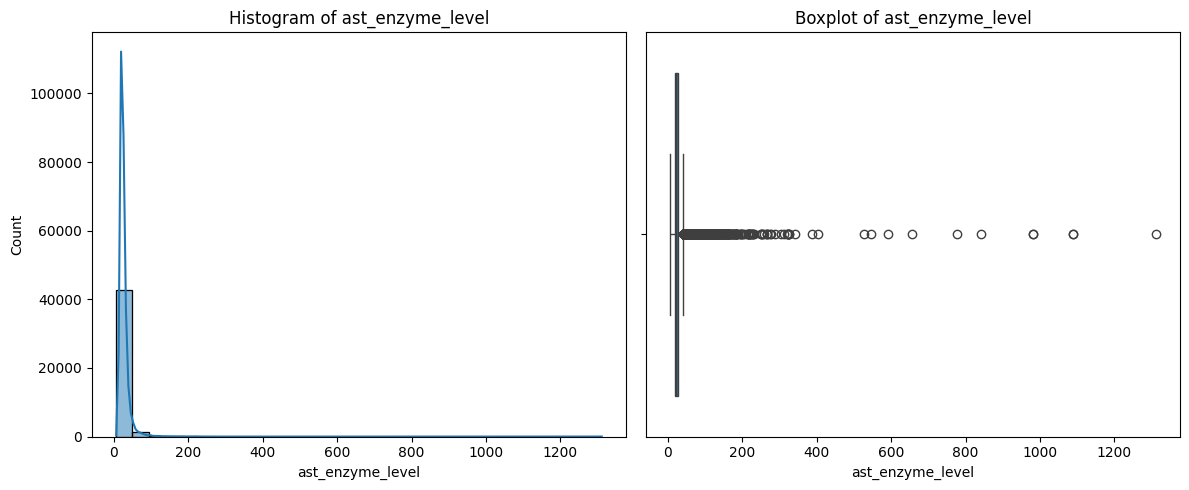

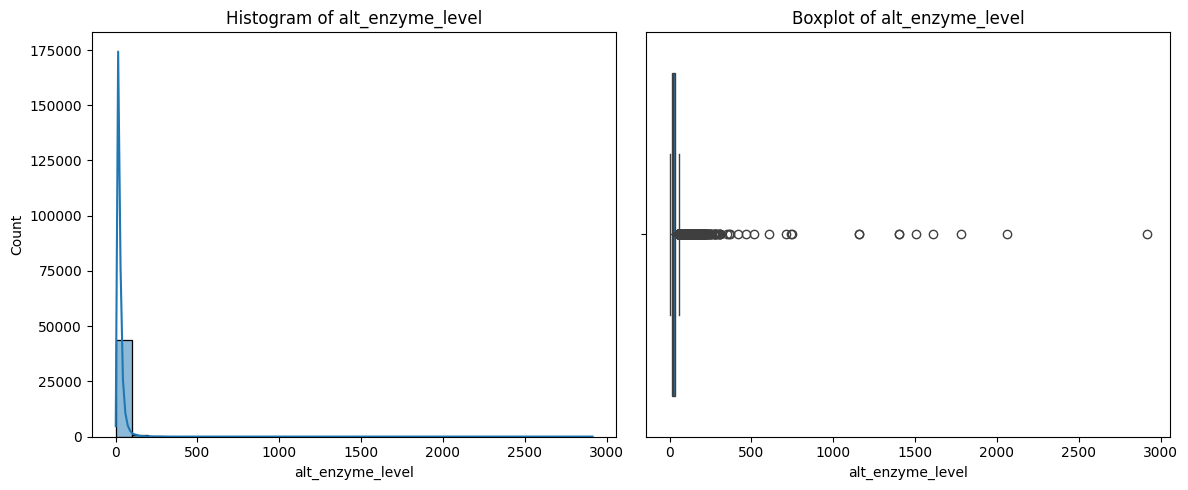

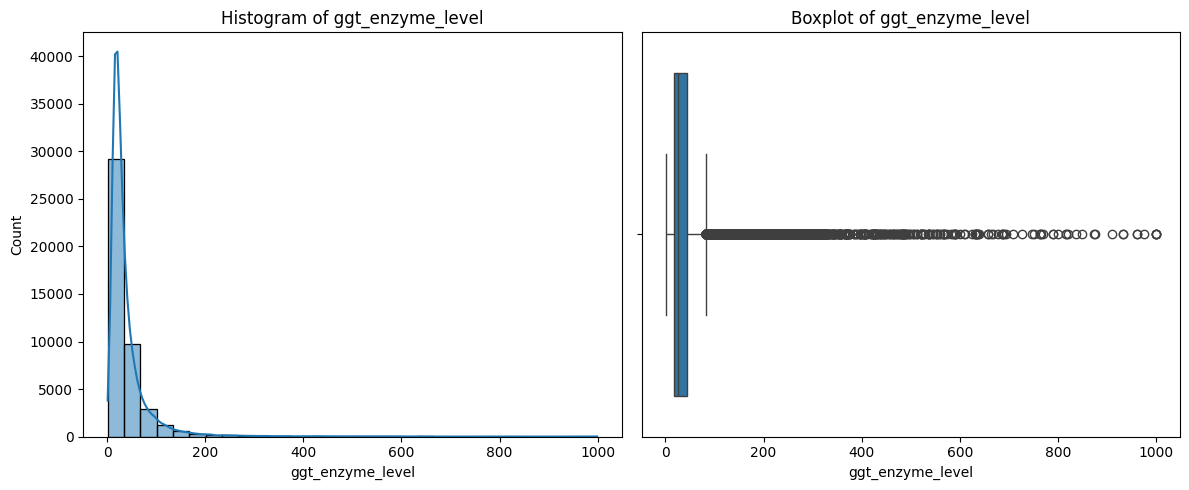

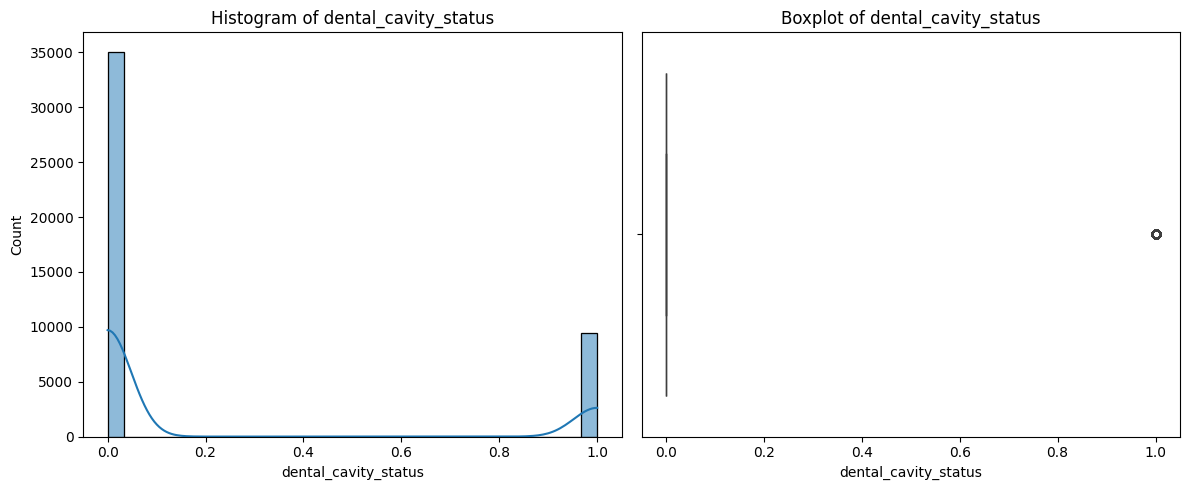

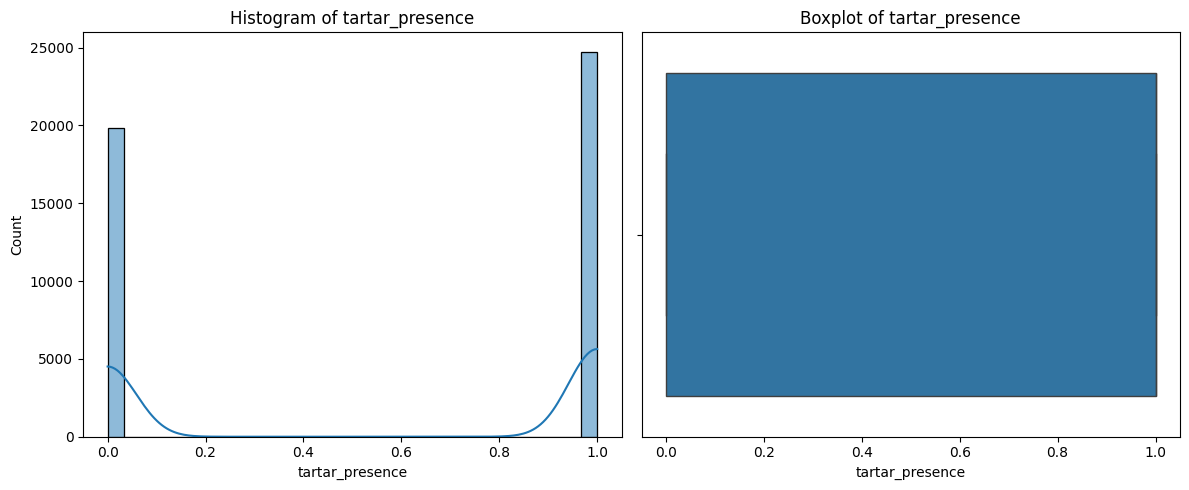

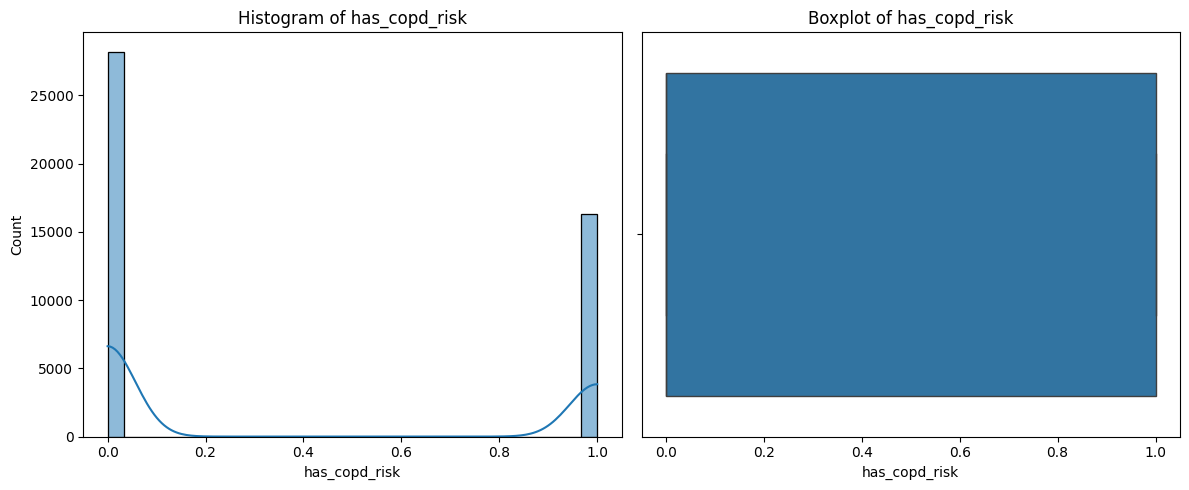

In [18]:
import seaborn as sns
numerical_features = train_df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()